### Capstone Project 1: Mental Health Survey (Our World in Data)

**Source:**

https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset


**About Dataset**


This dataset appears to contain a variety of features related to text analysis, sentiment analysis, and psychological indicators, likely derived from posts or text data. Some features include readability indices such as Automated Readability Index (ARI), Coleman Liau Index, and Flesch-Kincaid Grade Level, as well as sentiment analysis scores like sentiment compound, negative, neutral, and positive scores. Additionally, there are features related to psychological aspects such as economic stress, isolation, substance use, and domestic stress. The dataset seems to cover a wide range of linguistic, psychological, and behavioural attributes, potentially suitable for analyzing mental health-related topics in online communities or text data.

https://ourworldindata.org/mental-health#research-writing


**Benefits of using this dataset:**

- Insight into Mental Health: The dataset provides valuable insights into mental health by analyzing linguistic patterns, sentiment, and psychological indicators in text data. Researchers and data scientists can gain a better understanding of how mental health issues manifest in online communication.

- Predictive Modeling: With a wide range of features, including sentiment analysis scores and psychological indicators, the dataset offers opportunities for developing predictive models to identify or predict mental health outcomes based on textual data. This can be useful for early intervention and support.

- Community Engagement: Mental health is a topic of increasing importance, and this dataset can foster community engagement on platforms like Kaggle. Data enthusiasts, researchers, and mental health professionals can collaborate to analyze the data and develop solutions to address mental health challenges.

- Data-driven Insights: By analyzing the dataset, users can uncover correlations and patterns between linguistic features, sentiment, and mental health indicators. These insights can inform interventions, policies, and support systems aimed at promoting mental well-being.

- Educational Resource: The dataset can serve as a valuable educational resource for teaching and learning about mental health analytics, sentiment analysis, and text mining techniques. It provides a real-world dataset for students and practitioners to apply data science skills in a meaningful context.

In [715]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

from sklearn import metrics


sns.set(style='whitegrid')
plt.rcParams['figure.facecolor'] = (1,1,1,0.8)

In [716]:
df = pd.read_csv("Mental Health Dataset.csv")

In [717]:
df.head(5)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [719]:
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

df.drop(columns="Timestamp",inplace=True)

In [720]:
df.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858
unique,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,234000,165869,64728,255711,172357,143331,61994,97540,106844,101474,98592,150318,103136,100746,227036,115233


In [721]:
df

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


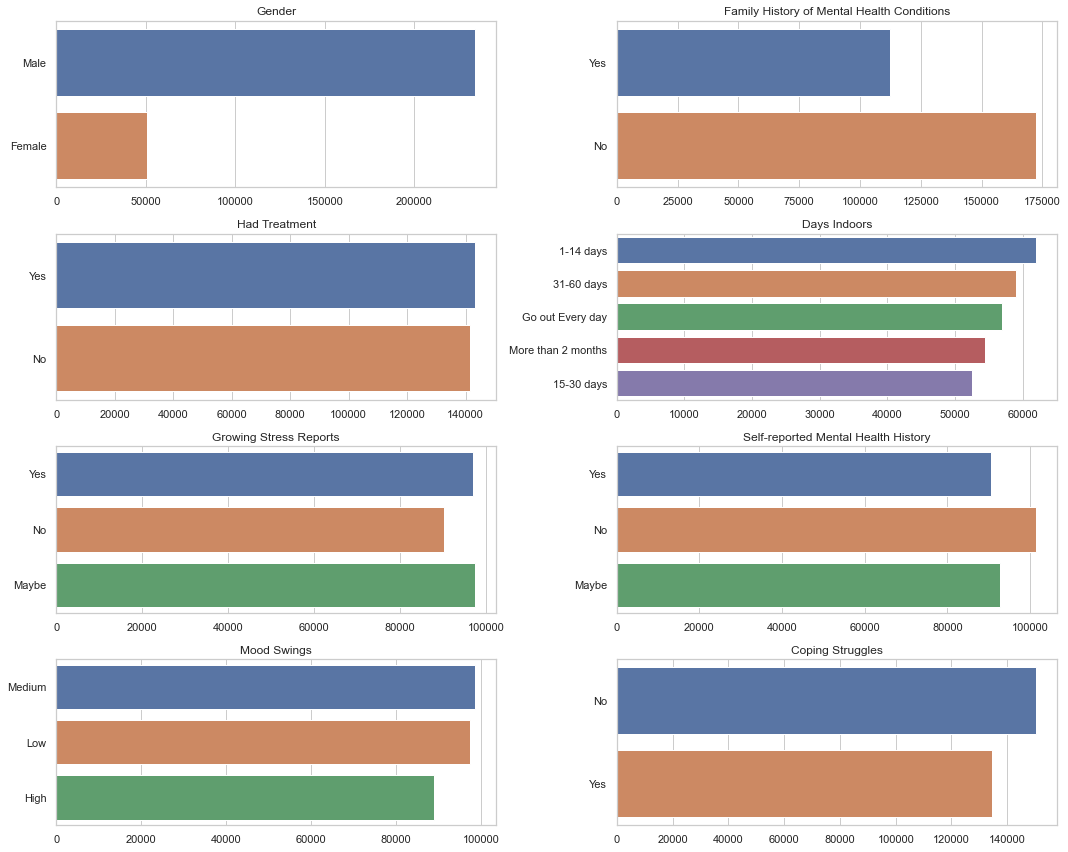

In [722]:
plt.figure(figsize=(15, 12))


plt.subplot(4, 2, 1)
sns.countplot(y='Gender', data=df, order = df['Gender'].value_counts().index).set(xlabel=None,ylabel=None)
plt.title('Gender')

plt.subplot(4, 2, 2)
sns.countplot(y='family_history', data=df).set(xlabel=None,ylabel=None)
plt.title('Family History of Mental Health Conditions')

plt.subplot(4, 2, 3)
sns.countplot(y='treatment', data=df).set(xlabel=None,ylabel=None)
plt.title('Had Treatment')

plt.subplot(4, 2, 4)
sns.countplot(y='Days_Indoors', data=df, order = df['Days_Indoors'].value_counts().index).set(xlabel=None,ylabel=None)
plt.title('Days Indoors')

plt.subplot(4, 2, 5)
sns.countplot(y='Growing_Stress', data=df).set(xlabel=None,ylabel=None)
plt.title('Growing Stress Reports')

plt.subplot(4, 2, 6)
sns.countplot(y='Mental_Health_History', data=df).set(xlabel=None,ylabel=None)
plt.title('Self-reported Mental Health History')

plt.subplot(4, 2, 7)
sns.countplot(y='Mood_Swings', data=df).set(xlabel=None,ylabel=None)
plt.title('Mood Swings')

plt.subplot(4, 2, 8)
sns.countplot(y='Coping_Struggles', data=df).set(xlabel=None,ylabel=None)
plt.title('Coping Struggles')

plt.tight_layout()
plt.show()

<ipython-input-723-a68454df3aa2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


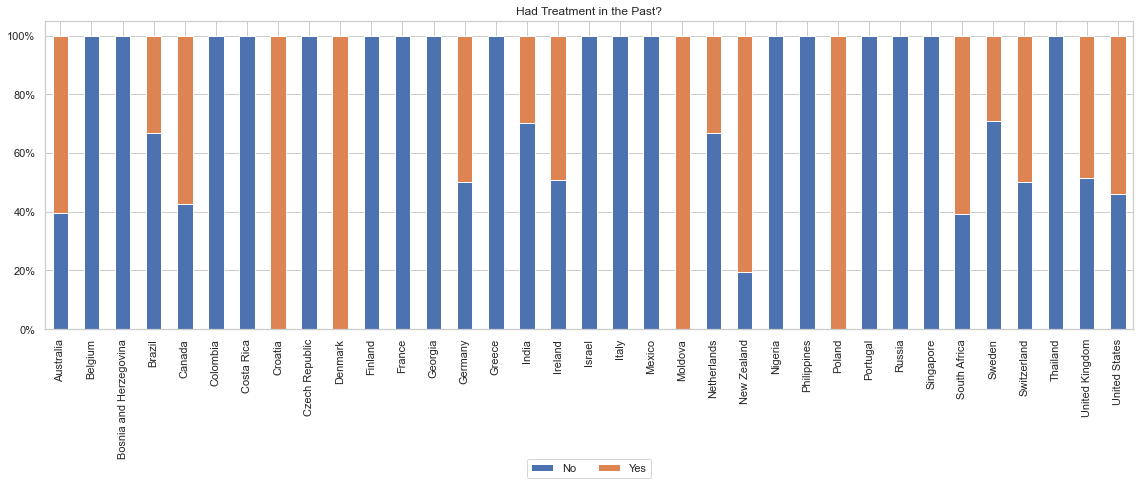

In [723]:
cross_tab = pd.crosstab(index=df['Country'],columns = df['treatment'], normalize="index")

cross_tab.plot(kind='bar', 
                stacked=True, 
                figsize=(16, 8))

plt.legend(loc="lower center", ncol=2, bbox_to_anchor = (0.5,-0.5))
plt.xlabel("")
plt.ylabel("")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.title('Had Treatment in the Past?')

plt.tight_layout()

plt.show()

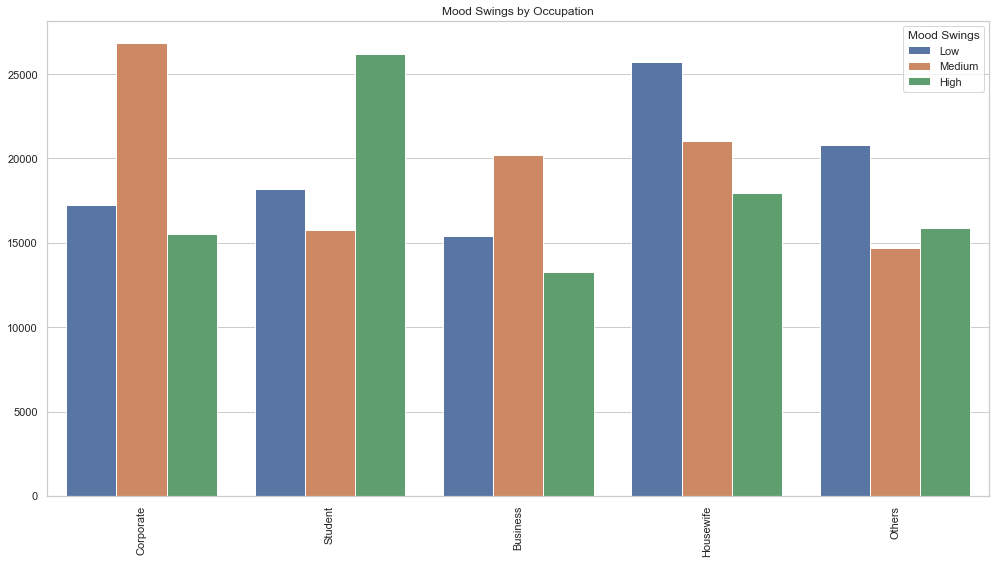

In [724]:
plt.figure(figsize=(14, 8))

sns.countplot(data=df, x="Occupation", hue='Mood_Swings',hue_order=['Low','Medium','High'])

plt.legend(title="Mood Swings")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90)  
plt.title("Mood Swings by Occupation")

plt.tight_layout()

plt.show()

In [725]:
cross_tab2 = pd.crosstab(index=df['Gender'],columns = df['Work_Interest'], normalize="index")
cross_tab2.style.format("{:.1%}")

Work_Interest,Maybe,No,Yes
Gender,,,
Female,33.4%,35.3%,31.3%
Male,34.9%,36.4%,28.7%


<ipython-input-726-9ff025e9c35e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()])


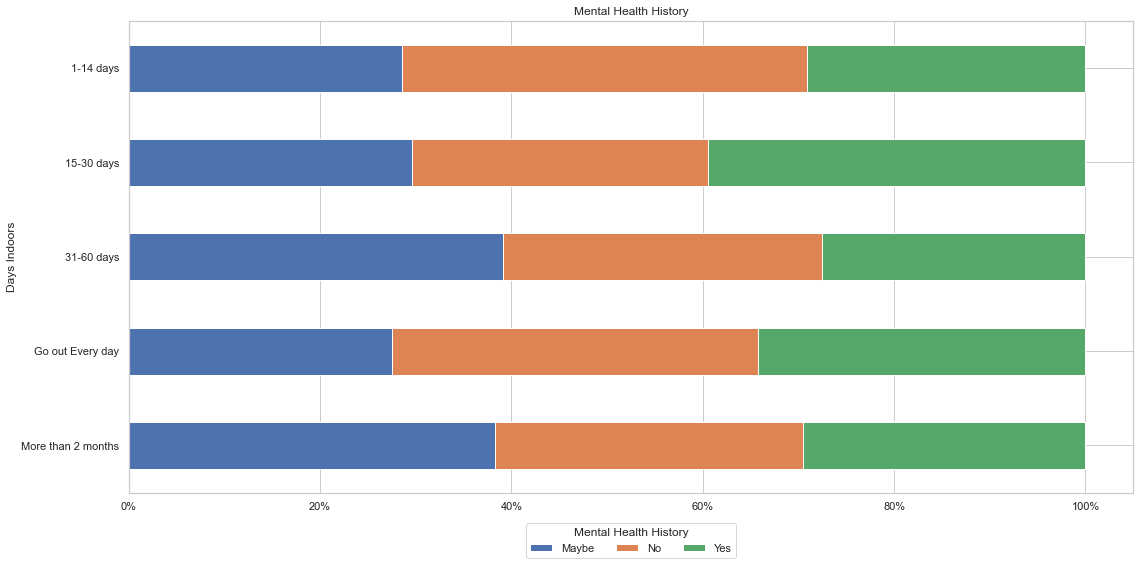

In [726]:
cross_tab3 = pd.crosstab(index=df['Days_Indoors'],columns = df['Mental_Health_History'], normalize="index").sort_values(by='Days_Indoors',ascending=False)

cross_tab3.plot(kind='barh', 
                stacked=True, 
                figsize=(16, 8))

plt.legend(loc="lower center", ncol=3, title='Mental Health History',bbox_to_anchor = (0.5,-0.15))
plt.xlabel("")
plt.ylabel("Days Indoors")
plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()]) 
plt.title('Mental Health History')

plt.tight_layout()

plt.show()

In [727]:
from sklearn.preprocessing import LabelEncoder

x = LabelEncoder()

df_fit = df.apply(x.fit_transform)

df_fit.head(3)

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1


<AxesSubplot:title={'center':'Correlation Matrix'}>

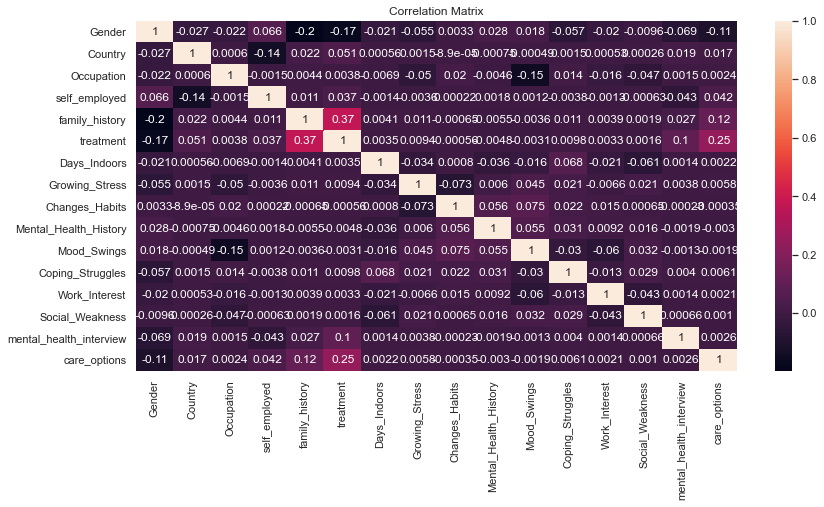

In [728]:
cmap=df_fit.corr()

plt.figure(figsize=(12,6))
plt.title('Correlation Matrix')

sns.heatmap(cmap,annot=True)

In [729]:
inputs = df_fit.drop('Growing_Stress', axis = 1)

targets = df_fit['Growing_Stress']

In [730]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size= 0.20, random_state = 11)

In [731]:
from sklearn.ensemble import RandomForestClassifier

rnd = RandomForestClassifier().fit(X_train, y_train)

In [732]:
y_pred = rnd.predict(X_test)

In [733]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19490
           1       0.99      0.99      0.99     18222
           2       0.98      0.98      0.98     19260

    accuracy                           0.99     56972
   macro avg       0.99      0.99      0.99     56972
weighted avg       0.99      0.99      0.99     56972



In [734]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

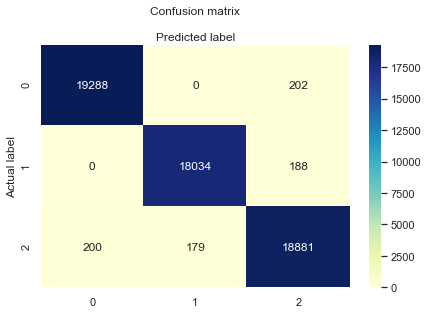

In [735]:
class_names=[0,1,2]  

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [736]:
importance = rnd.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04277
Feature: 1, Score: 0.00531
Feature: 2, Score: 0.17024
Feature: 3, Score: 0.00098
Feature: 4, Score: 0.00152
Feature: 5, Score: 0.00129
Feature: 6, Score: 0.17604
Feature: 7, Score: 0.10638
Feature: 8, Score: 0.11238
Feature: 9, Score: 0.10667
Feature: 10, Score: 0.06083
Feature: 11, Score: 0.10014
Feature: 12, Score: 0.11145
Feature: 13, Score: 0.00180
Feature: 14, Score: 0.00220


c:\Users\fkoze\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


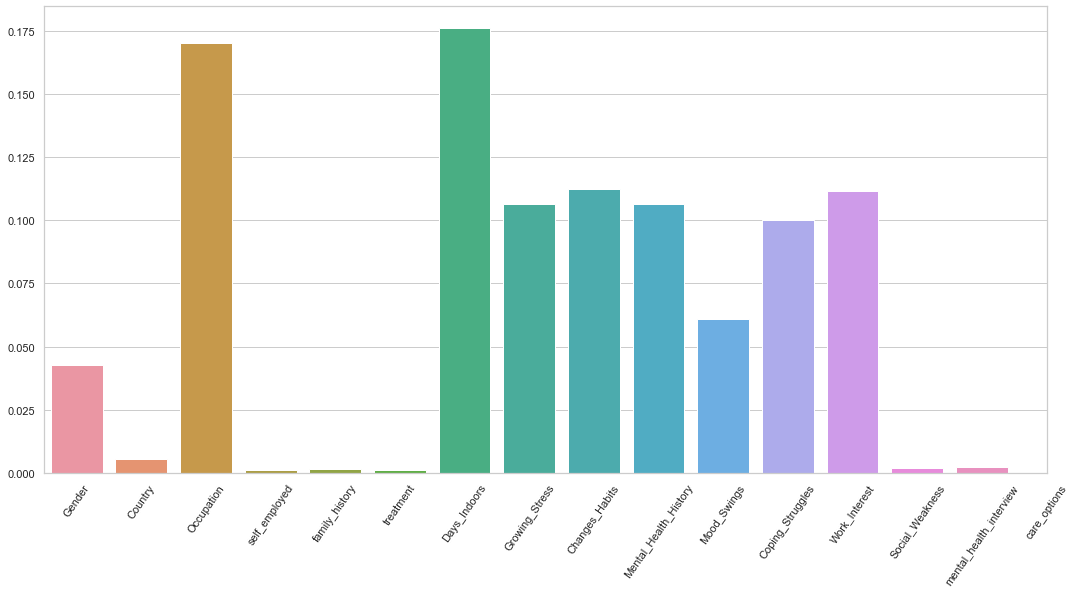

In [737]:
input_labels = []

for col in df.columns:
    input_labels.append(col) 
    
   
plt.figure(figsize=(16, 8))
sns.barplot([x for x in range(len(importance))], importance)
plt.xticks(np.arange(0,len(input_labels)), input_labels, rotation = 55)
plt.show()